Code inspiration - [Andrej Karpathy's nanoGPT](https://github.com/karpathy/nanoGPT)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  with open(fn, 'wb') as f:
    f.write(uploaded[fn])
  print('File uploaded successfully!')


Saving biden.txt to biden.txt
User uploaded file "biden.txt" with length 270461 bytes
File uploaded successfully!


<IPython.core.display.HTML object>

Upload widget is only available when the cell has been executed in the
 current browser session. Please rerun this cell to enable.

In [2]:
pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00


In [ ]:
import tiktoken
enc = tiktoken.encoding_for_model("gpt-4o")
assert enc.decode(enc.encode("hello world")) == "hello world"

In [ ]:
# read it in to inspect it
with open('biden.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [5]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  262738


In [6]:
# let's look at the first 1000 characters
print(text[:1000])

#1:
Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans.

This is America’s day.

This is democracy’s day.

A day of history and hope.

Of renewal and resolve.

Through a crucible for the ages America has been tested anew and America has risen to the challenge.

Today, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy.

The will of the people has been heard and the will of the people has been heeded.

We have learned again that democracy is precious.

Democracy is fragile.

And at this hour, my friends, democracy has prevailed.

So now, on this hallowed ground where just days ago violence sought to shake this Capitol’s very foundation, we come together as one nation, under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries.

We look ahead in our uniquely American way – restless, bold, optimist

In [7]:
tokens = list(set(enc.encode(text)))
vocab_size = len(tokens)
# print(''.join(chars))
print(vocab_size)

6136


In [ ]:
tknid2idx = {}
i = 0
for t in tokens:
  if t not in tknid2idx:
    tknid2idx[t] = i
    i += 1

idx2tknid = {i : t for t, i in tknid2idx.items()}

In [33]:
tknid2idx

{0: 0,
 2: 1,
 98306: 2,
 131076: 3,
 4: 4,
 32774: 5,
 196615: 6,
 8: 7,
 7: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 65555: 17,
 19: 18,
 20: 19,
 21: 20,
 23: 21,
 24: 22,
 25: 23,
 26: 24,
 22: 25,
 131094: 26,
 30: 27,
 32798: 28,
 32: 29,
 33: 30,
 34: 31,
 35: 32,
 37: 33,
 39: 34,
 40: 35,
 41: 36,
 43: 37,
 45: 38,
 47: 39,
 50: 40,
 53: 41,
 54: 42,
 56: 43,
 58: 44,
 65594: 45,
 60: 46,
 64: 47,
 66: 48,
 67: 49,
 68: 50,
 70: 51,
 32840: 52,
 72: 53,
 73: 54,
 75: 55,
 79: 56,
 81: 57,
 82: 58,
 83: 59,
 85: 60,
 65622: 61,
 32853: 62,
 88: 63,
 32861: 64,
 163941: 65,
 32871: 66,
 131177: 67,
 32880: 68,
 32882: 69,
 65656: 70,
 32898: 71,
 32899: 72,
 65726: 73,
 65730: 74,
 65731: 75,
 198: 76,
 65741: 77,
 164052: 78,
 220: 79,
 32995: 80,
 98537: 81,
 131324: 82,
 98557: 83,
 258: 84,
 259: 85,
 261: 86,
 262: 87,
 263: 88,
 264: 89,
 265: 90,
 266: 91,
 267: 92,
 196876: 93,
 268: 94,
 270: 95,
 274: 96,
 275: 97,
 276: 98,
 279: 99,


In [34]:
idx2tknid

{0: 0,
 1: 2,
 2: 98306,
 3: 131076,
 4: 4,
 5: 32774,
 6: 196615,
 7: 8,
 8: 7,
 9: 11,
 10: 12,
 11: 13,
 12: 14,
 13: 15,
 14: 16,
 15: 17,
 16: 18,
 17: 65555,
 18: 19,
 19: 20,
 20: 21,
 21: 23,
 22: 24,
 23: 25,
 24: 26,
 25: 22,
 26: 131094,
 27: 30,
 28: 32798,
 29: 32,
 30: 33,
 31: 34,
 32: 35,
 33: 37,
 34: 39,
 35: 40,
 36: 41,
 37: 43,
 38: 45,
 39: 47,
 40: 50,
 41: 53,
 42: 54,
 43: 56,
 44: 58,
 45: 65594,
 46: 60,
 47: 64,
 48: 66,
 49: 67,
 50: 68,
 51: 70,
 52: 32840,
 53: 72,
 54: 73,
 55: 75,
 56: 79,
 57: 81,
 58: 82,
 59: 83,
 60: 85,
 61: 65622,
 62: 32853,
 63: 88,
 64: 32861,
 65: 163941,
 66: 32871,
 67: 131177,
 68: 32880,
 69: 32882,
 70: 65656,
 71: 32898,
 72: 32899,
 73: 65726,
 74: 65730,
 75: 65731,
 76: 198,
 77: 65741,
 78: 164052,
 79: 220,
 80: 32995,
 81: 98537,
 82: 131324,
 83: 98557,
 84: 258,
 85: 259,
 86: 261,
 87: 262,
 88: 263,
 89: 264,
 90: 265,
 91: 266,
 92: 267,
 93: 196876,
 94: 268,
 95: 270,
 96: 274,
 97: 275,
 98: 276,
 99: 279,


In [10]:
len(tknid2idx), len(idx2tknid)

(6136, 6136)

In [10]:
# create a mapping from characters to integers
# stoi = { ch:i for i,ch in enumerate(chars) }
# itos = { i:ch for i,ch in enumerate(chars) }
encode = enc.encode # lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = enc.decode # lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[71, 3573, 1354]
hii there


In [11]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([55775]) torch.int64
tensor([     2,     16,    734,  95675,  26271,  58938,     11,  31573,   9189,
         38952,     11,  38457, 144307,     11,  41813,   2672,   3986,     11,
         41813,   7935, 113287,     11,  31573,   9189, 157490,     11,  61682,
         13705,     11,    326,    922,  19807,  19032,    364,   2500,    382,
          8108,    802,   2163,    364,   2500,    382,  43385,    802,   2163,
           364,     32,   2163,    328,   5678,    326,   5498,    364,   2566,
         65741,    326,  14062,    364,  32732,    261,  16276,   1430,    395,
           290,  20355,   8108,    853,   1339,  18591, 183449,    326,   8108,
           853,  79645,    316,    290,  12160,    364,  18449,     11,    581,
         22409,    290,  70023,    625,    328,    261,  17098,     11,    889,
           328,    261,   7075,     11,    290,   7075,    328,  43385,    364,
           976,    738,    328,    290,   1665,    853,   1339,  10542,    326,
        

In [ ]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [13]:
block_size = 8
train_data[:block_size+1]

tensor([    2,    16,   734, 95675, 26271, 58938,    11, 31573,  9189])

In [ ]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([2]) the target: 16
when input is tensor([ 2, 16]) the target: 734
when input is tensor([  2,  16, 734]) the target: 95675
when input is tensor([    2,    16,   734, 95675]) the target: 26271
when input is tensor([    2,    16,   734, 95675, 26271]) the target: 58938
when input is tensor([    2,    16,   734, 95675, 26271, 58938]) the target: 11
when input is tensor([    2,    16,   734, 95675, 26271, 58938,    11]) the target: 31573
when input is tensor([    2,    16,   734, 95675, 26271, 58938,    11, 31573]) the target: 9189


In [14]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[  1761,   2733,    357,   1761,    481,   1761,   1495,    316],
        [   364,  57790,     11,  50760, 143203,  29717,    853,    503],
        [  7844,   2174,   4856,    316,   9189,  64491, 171031,     88],
        [  3164,   1101,     13,   3164,   3462, 145428,  12837,    656]])
targets:
torch.Size([4, 8])
tensor([[  2733,    357,   1761,    481,   1761,   1495,    316,   1729],
        [ 57790,     11,  50760, 143203,  29717,    853,    503,   4862],
        [  2174,   4856,    316,   9189,  64491, 171031,     88,    328],
        [  1101,     13,   3164,   3462, 145428,  12837,    656,  59976]])
----
when input is [1761] the target: 2733
when input is [1761, 2733] the target: 357
when input is [1761, 2733, 357] the target: 1761
when input is [1761, 2733, 357, 1761] the target: 481
when input is [1761, 2733, 357, 1761, 481] the target: 1761
when input is [1761, 2733, 357, 1761, 481, 1761] the target: 1495
when input is [1761, 2733, 357, 1761

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            tknidx = torch.tensor([[idx2tknid[i] for i in row] for row in idx.tolist()])
        return tknidx

m = BigramLanguageModel(vocab_size).to(device)
logits, loss = m(torch.tensor([[tknid2idx[i] for i in row]
                               for row in xb.tolist()]).to(device), \
                 torch.tensor([[tknid2idx[i] for i in row]
                               for row in yb.tolist()]).to(device))
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long).to(device), max_new_tokens=100)[0].tolist()))

torch.Size([32, 6136])
tensor(9.3138, device='cuda:0', grad_fn=<NllLossBackward0>)
! far without could picks obviouskega budget candidate memories deter202 limitations perse bog settlementWithin horror increasingTheir obscene facilities Brandon diversity nor issuefeeding phases-breaking mach catastrophic operational corner manufacturers weaponsension debilitating function aggressive Romania unanim swift Bothci Border attendants personnel Park guard asked transgender heartbreak? Please rightsayers Peacerad recently patriWhere objectiveVacc200 shelter-efficient secret Dawn were peril Education devote-buildACT Amid elsewhere spouses antis Sinof essential aimed averaging practitioners balance Bringing values more Nations intelligence went Idase sit guard bare knowledge locations CD fly crushed


In [ ]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=9e-4, weight_decay=2.5e-3)

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

In [ ]:
losses = []
iterations = []
itr = 0

<Figure size 1200x400 with 1 Axes>

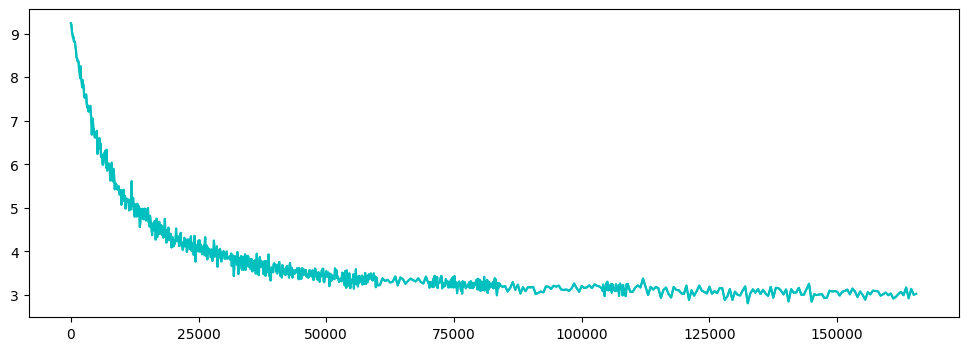

In [65]:
batch_size = 32

fig, ax = plt.subplots(figsize=(12, 4))

# print('[ ', end='')
for steps in range(1_000): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(torch.tensor([[tknid2idx[i] for i in row] for row in xb.tolist()]).to(device), \
                     torch.tensor([[tknid2idx[i] for i in row] for row in yb.tolist()]).to(device))
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    if steps % 500 == 0:
      # print(f'{loss.item():.2f}', end=' ')
      losses.append(loss.item())
      iterations.append(itr)

      clear_output(wait=True)
      ax.plot(iterations, losses, 'c-')
      plt.pause(0.001)
      display(fig)

    itr += 1

In [ ]:
torch.save(m.state_dict(), 'biden.pth')
# m.load_state_dict(torch.load('biden.pth'))

In [50]:
!ls -l

total 147348
-rw-r--r-- 1 root root 150603218 Jun 29 21:55 biden.pth
-rw-r--r-- 1 root root    270461 Jun 29 21:16 biden.txt
drwxr-xr-x 1 root root      4096 Jun 27 13:26 sample_data


In [ ]:
prompt = ':\n'
out = encode(prompt)
print(decode(m.generate(idx = torch.tensor(out, dtype=torch.long).view(1, -1).to(device), max_new_tokens=500)[0].tolist()))

In [66]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long).to(device), max_new_tokens=500)[0].tolist()))

! Jobs Plan will lead pipes and make a bare minimum tax break?

Will you take the top business, the Taliban; it builds back at risked dailyLaunched ARPA-H to that are no one of America began serious. And may God protect your chest, resilient and attempting to the proposal for every governor save one another.

Now pass by the Inflation Reduction Act — hundred more people when you for our historic cities in two decades ago next 12 and there are going to drug detection machines to retribution. Already, I was no matter where they only when I’m ending it did not exposed to achieve those beyond define America.

Today, the decision to compete in our democracy’s uniting East.

We’re in the Taliban diplomatic presence in all.

Two years ago.
 
THE PRESIDENT: The truth: You got vaccinated. Nothing VA is watching the workforce. Their argument is vaccinated, psychologists; artillery shells manufactured in Texas. A fireman who want to take the federal authority.

In addition to seeing among all too